In [2]:
using VortexDistributions, Plots
gr(transpose=true,xlabel="x",ylabel="y",legend=false)

┌ Info: Precompiling VortexDistributions [b688e990-d167-11e8-1f13-43a2532b2fa8]
└ @ Base loading.jl:1278


Plots.GRBackend()

In what follows, we consider a system of area 200x200 healing lengths, with 2 grid points per healing length in each direction. In GP simulations using Fourier derivatives, this is the bare minimum grid resolution that can capture vortex dynamics.

In [3]:
Lx=200;Nx=400;
Ly=200;Ny=400
x = LinRange(-Lx/2,Lx/2,Nx);dx=diff(x)[1]
y = LinRange(-Ly/2,Ly/2,Ny);dy=diff(y)[1]

#make vortex near the orgin
facx,facy = rand(2)
testvort = [10+dx*facx 10+dy*facy 1.0]
testv = ScalarVortex.(testvort)

## construct vortex wavefunction
ψ = one.(x.*y') |> complex
psi = Torus(ψ,x,y)
vortex!(psi,ScalarVortex(testvort))

MethodError: MethodError: no method matching ScalarVortex(::Float64)
Closest candidates are:
  ScalarVortex(::Float64, !Matched::Array{PointVortex,1}) at /Users/abradley/.julia/dev/VortexDistributions/src/creation.jl:93
  ScalarVortex(::Float64, !Matched::PointVortex) at /Users/abradley/.julia/dev/VortexDistributions/src/creation.jl:95
  ScalarVortex(!Matched::T, !Matched::PointVortex) where T<:CoreShape at /Users/abradley/.julia/dev/VortexDistributions/src/types.jl:60
  ...

In [4]:
nt,np,nn,vortices = findvortices(ψ,x,y)

(1, 1, 0, [10.3274 10.3178 1.0])

In [6]:
p1=heatmap(x,y,angle.(ψ))
scatter!([vortices[1]], [vortices[2]])
scatter!([testvort[1]], [testvort[2]],m=:cross,ms=10,c=:white);

In [7]:
zr = 215:225
p2=heatmap(x[zr],y[zr],angle.(ψ[zr,zr]))
scatter!([vortices[1]], [vortices[2]])
scatter!([testvort[1]], [testvort[2]],m=:cross,ms=10,c=:white);

In [8]:
zr = 221:221
p3=heatmap(x[zr],y[zr],angle.(ψ[zr,zr]),transpose=true)
scatter!([vortices[1]], [vortices[2]],legend=false)
scatter!([testvort[1]], [testvort[2]],m=:cross,ms=10,c=:white);

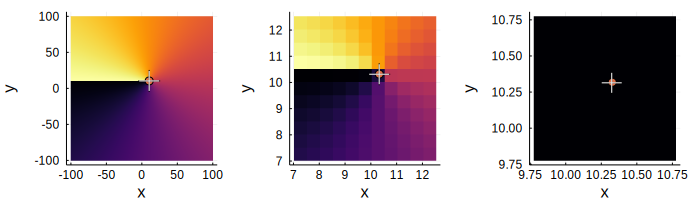

In [23]:
p=plot(p1,p2,p3,layout=(1,3),size=(700,200))

In [10]:
q1=heatmap(x,y,abs2.(ψ),c=:viridis)
scatter!([vortices[1]], [vortices[2]])
scatter!([testvort[1]], [testvort[2]],m=:cross,ms=10,c=:white);

In [11]:
zr = 210:230
q2=heatmap(x[zr],y[zr],abs2.(ψ[zr,zr]),c=:viridis)
scatter!([vortices[1]], [vortices[2]])
scatter!([testvort[1]], [testvort[2]],m=:cross,ms=10,c=:white);

In [12]:
zr = 221:221
q3=heatmap(x[zr],y[zr],angle.(ψ[zr,zr]),c=:viridis)
scatter!([vortices[1]], [vortices[2]],legend=false)
scatter!([testvort[1]], [testvort[2]],m=:cross,ms=10,c=:white);

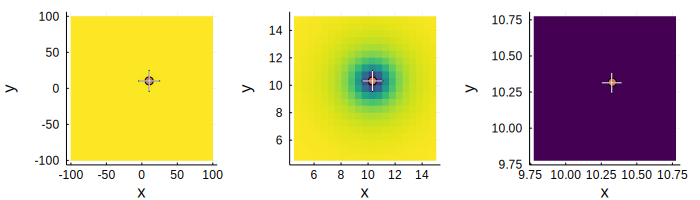

In [22]:
q=plot(q1,q2,q3,layout=(1,3),size=(700,200))

In [24]:
savefig(p,"phase")
savefig(q,"density")

In [25]:
testvort

1×3 Array{Float64,2}:
 10.3234  10.314  1.0

In [26]:
vortices

1×3 Array{Float64,2}:
 10.3274  10.3178  1.0

In [27]:
using BenchmarkTools

In [28]:
@btime nt,np,nn,vortices = findvortices(ψ,x,y)

  6.165 ms (550 allocations: 3.96 MiB)


(1, 1, 0, [10.3274 10.3178 1.0])